In [1]:
from data import *

Using TensorFlow backend.


# data augmentation 

In deep learning tasks, a lot of data is need to train DNN model, when the dataset is not big enough, data augmentation should be applied.

keras.preprocessing.image.ImageDataGenerator is a data generator, which can feed the DNN with data like : (data,label), it can also do data augmentation at the same time.

It is very convenient for us to use keras.preprocessing.image.ImageDataGenerator to do data augmentation by implement image rotation, shift, rescale and so on... see [keras documentation](https://keras.io/preprocessing/image/) for detail.

For image segmentation tasks, the image and mask must be transformed **together!!**

## define your data generator

If you want to visualize your data augmentation result, set save_to_dir = your path

In [18]:
#if you don't want to do data augmentation, set data_gen_args as an empty dict.
#data_gen_args = dict()

data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGenerator = trainGenerator(99,'data/vert/train','image','label',data_gen_args,save_to_dir = "data/vert/train/aug")

## visualize your data augmentation result

In [19]:
#you will see 60 transformed images and their masks in data/membrane/train/aug
num_batch = 3
for i,batch in enumerate(myGenerator):
    if(i >= num_batch):
        break

Found 99 images belonging to 1 classes.
Found 99 images belonging to 1 classes.


## create .npy data

If your computer has enough memory, you can create npy files containing all your images and masks, and feed your DNN with them.

In [20]:
image_arr,mask_arr = geneTrainNpy("data/vert/train/aug/","data/vert/train/aug/")
np.save("data/vert/npydata/image_arr.npy",image_arr)
np.save("data/vert/npydata/mask_arr.npy",mask_arr)

In [21]:
image_arr.shape

(476, 256, 256, 1)

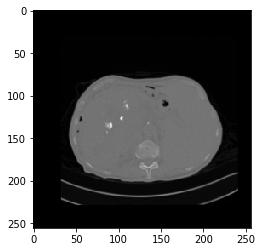

In [17]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(np.reshape(image_arr[0], (image_arr[0].shape[:2])), cmap="gray")